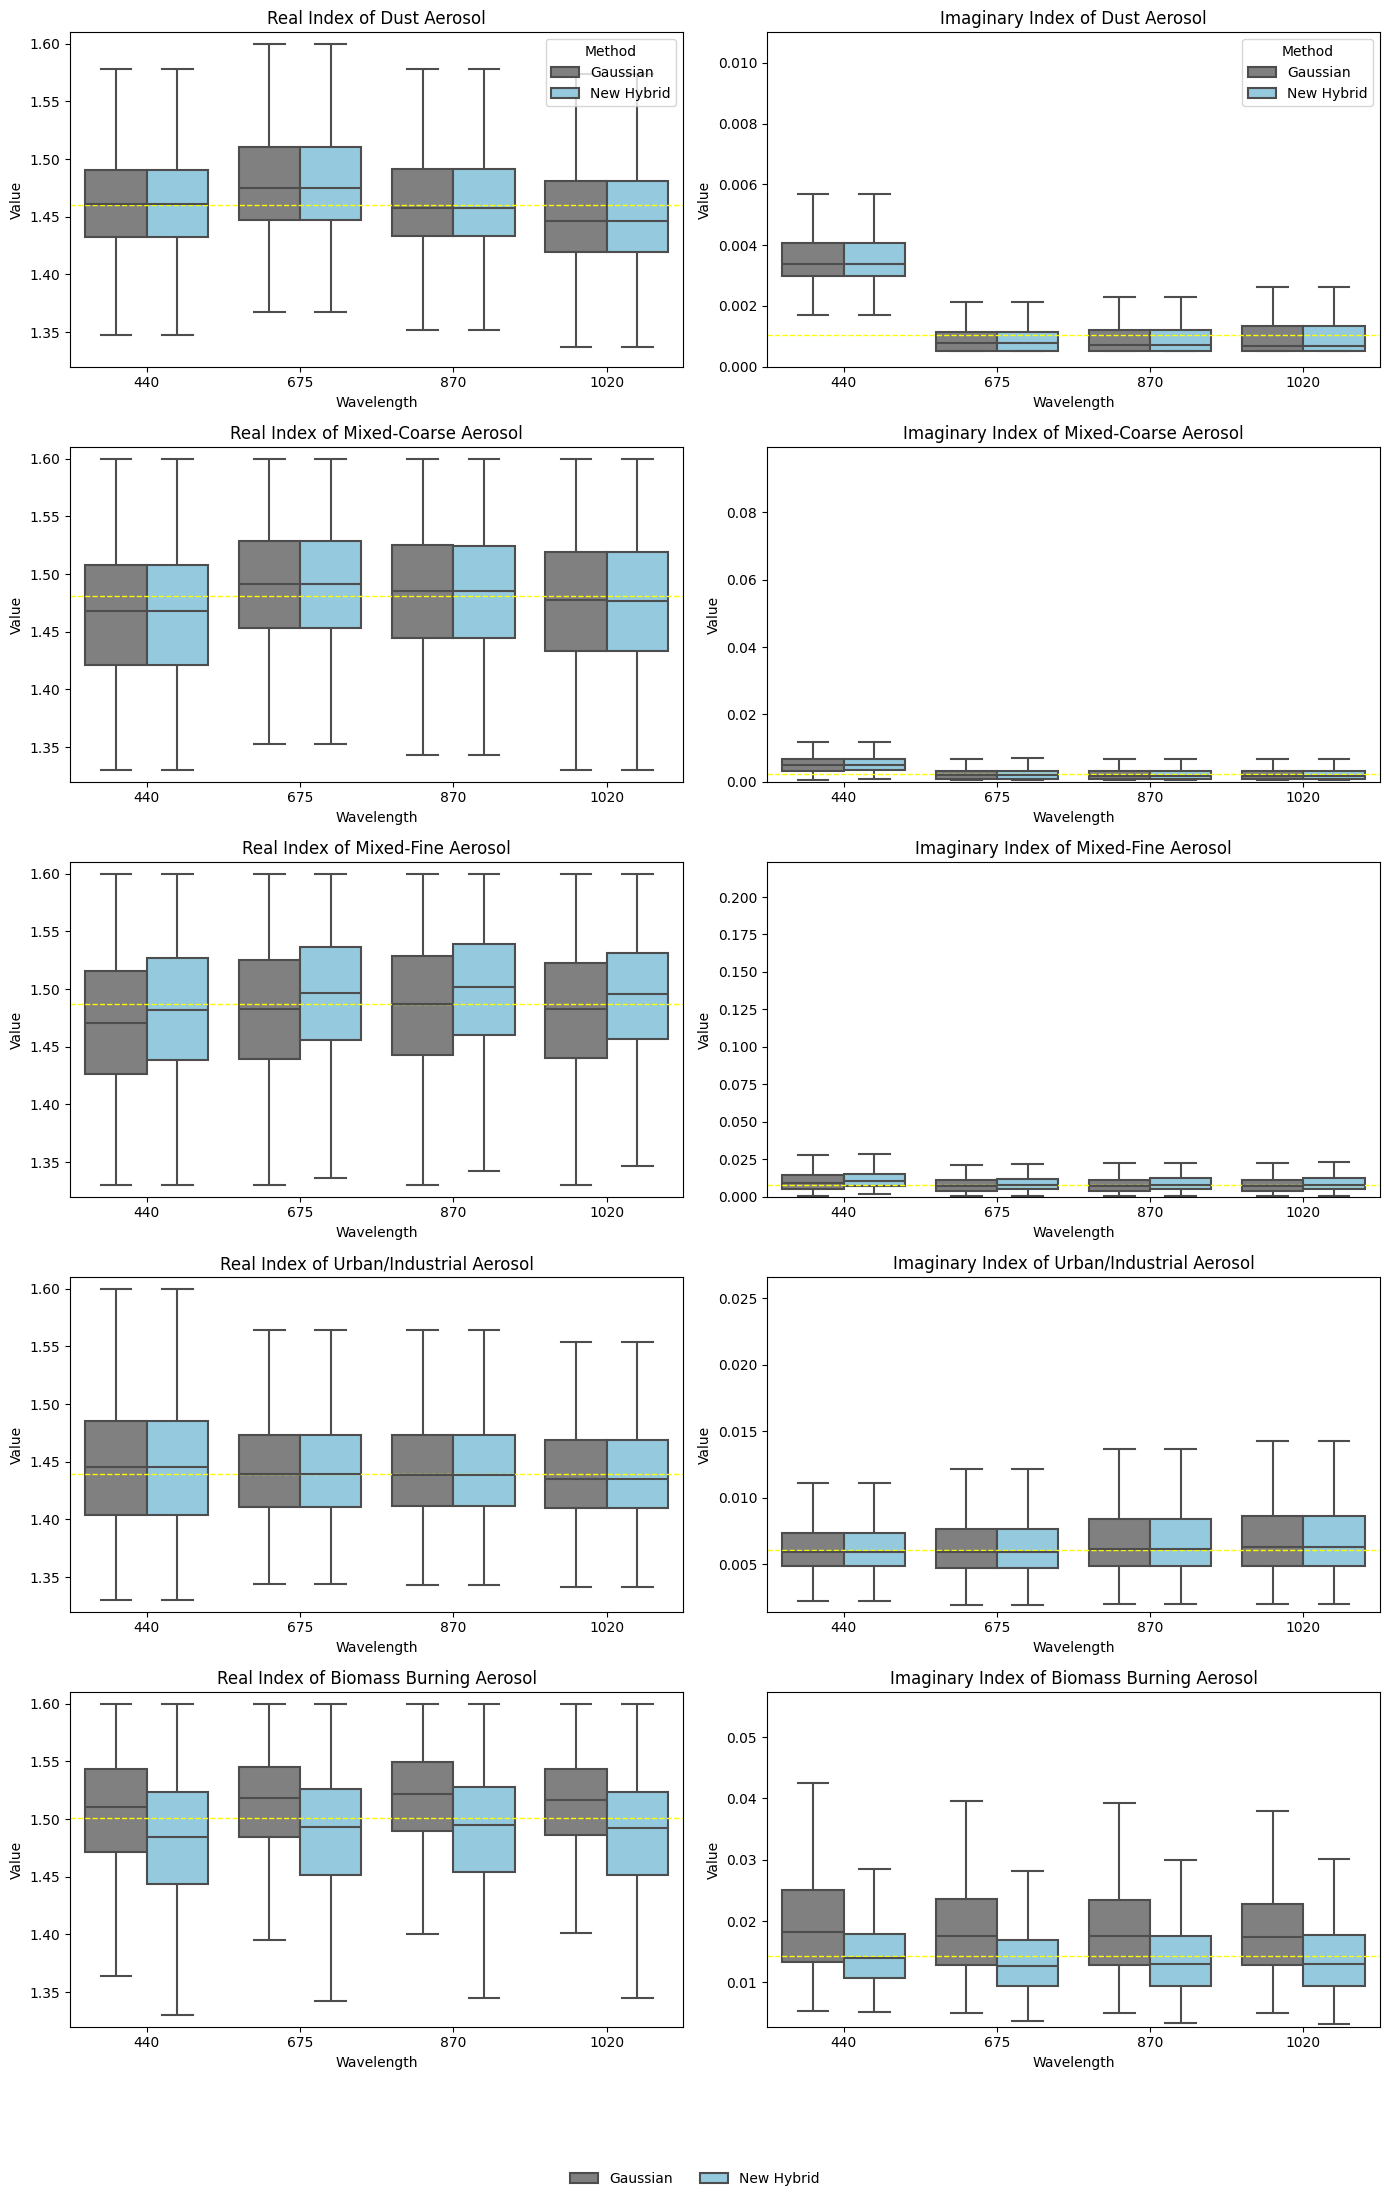

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
df1 = pd.read_csv('/content/1.csv')
df2 = pd.read_csv('/content/2.csv')

# Define categories
aerosol_types = ['Dust', 'Mixed-Coarse', 'Mixed-Fine', 'Urban/Industrial', 'Biomass Burning']
wavelengths = ['440', '675', '870', '1020']

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
plt.subplots_adjust(hspace=0.6)

for i, aerosol in enumerate(aerosol_types):
    sub1 = df1[df1['aerosol_type'] == aerosol]
    sub2 = df2[df2['Aerosol_Type'] == aerosol]

    real_list, imag_list = [], []

    for wl in wavelengths:
        real1 = sub1.get(f'ri_real_{wl}')
        real2 = sub2.get(f'ri_real_{wl}')
        imag1 = sub1.get(f'ri_imag_{wl}')
        imag2 = sub2.get(f'ri_imag_{wl}')

        if real2 is not None and real2.notna().any():
            real_list.append(pd.DataFrame({
                'Wavelength': wl,
                'Value': real2,
                'Method': 'Gaussian'  # Gaussian
            }))
        if real1 is not None and real1.notna().any():
            real_list.append(pd.DataFrame({
                'Wavelength': wl,
                'Value': real1,
                'Method': 'New Hybrid'  # New Hybrid
            }))

        if imag2 is not None and imag2.notna().any():
            imag_list.append(pd.DataFrame({
                'Wavelength': wl,
                'Value': imag2,
                'Method': 'Gaussian'
            }))
        if imag1 is not None and imag1.notna().any():
            imag_list.append(pd.DataFrame({
                'Wavelength': wl,
                'Value': imag1,
                'Method': 'New Hybrid'
            }))

    # Plot Real Index
    ax_real = axes[i, 0]
    if real_list:
        real_df = pd.concat(real_list, ignore_index=True)
        box = sns.boxplot(data=real_df, x='Wavelength', y='Value', hue='Method',
                          palette={'New Hybrid': '#87CEEB', 'Gaussian': '#808080'},
                          showfliers=False, ax=ax_real, linewidth=1.5)
        ax_real.set_title(f'Real Index of {aerosol} Aerosol')
        median = real_df['Value'].median()
        ax_real.axhline(median, color='yellow', linestyle='--', linewidth=1)
        ymin, ymax = real_df['Value'].min(), real_df['Value'].max()
        ax_real.set_ylim(ymin - 0.01, ymax + 0.01)
        if i != 0:
            ax_real.get_legend().remove()
    else:
        ax_real.set_visible(False)

    # Plot Imaginary Index
    ax_imag = axes[i, 1]
    if imag_list:
        imag_df = pd.concat(imag_list, ignore_index=True)
        box = sns.boxplot(data=imag_df, x='Wavelength', y='Value', hue='Method',
                          palette={'New Hybrid': '#87CEEB', 'Gaussian': '#808080'},
                          showfliers=False, ax=ax_imag, linewidth=1.5)
        ax_imag.set_title(f'Imaginary Index of {aerosol} Aerosol')
        median = imag_df['Value'].median()
        ax_imag.axhline(median, color='yellow', linestyle='--', linewidth=1)
        ymin, ymax = imag_df['Value'].min(), imag_df['Value'].max()
        ax_imag.set_ylim(ymin - 0.0005, ymax + 0.0005)  # Zoom in tighter
        if i != 0:
            ax_imag.get_legend().remove()
    else:
        ax_imag.set_visible(False)

# Single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
